In [6]:
!pwd

/home/dodo/projects/aDNA_Comparative_Analysis/notebooks


# Example analysis using the EIGENSOFT package
## We'll follow these steps:

* Setup and Configuration: Ensure that all necessary files and configurations are in place.
* File Conversion: Use convertf to convert example data into the required format.
* PCA Analysis: Use smartpca to perform Principal Components Analysis (PCA).
* Plotting Results: Use ploteig to visualize the results of PCA.

In [7]:
import os
import subprocess


In [8]:
# Define the paths
base_dir = os.path.abspath("../EIG")
out_dir = os.path.abspath("../output")
bin_dir = os.path.join(base_dir, "bin")
convertf_dir = os.path.join(base_dir, "CONVERTF")
eigenstrat_dir = os.path.join(base_dir, "EIGENSTRAT")
notebook_dir = os.getcwd()

# Define the output directory for EIGENSOFT analysis
output_dir = os.path.join(out_dir, "EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

# File paths for the parameter files
convertf_par_file = os.path.join(notebook_dir, "par.ANCESTRYMAP.EIGENSTRAT")
smartpca_par_file = os.path.join(notebook_dir, "par.smartpca")
smarteigenstrat_par_file = os.path.join(output_dir, "example.chisq.par")


In [9]:
# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(convertf_dir, "example.ancestrymapgeno")}
snpname:         {os.path.join(convertf_dir, "example.snp")}
indivname:       {os.path.join(convertf_dir, "example.ind")}
outputformat:    EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "example.eigenstratgeno")}
snpoutfilename:  {os.path.join(output_dir, "example.snp")}
indoutfilename:  {os.path.join(output_dir, "example.ind")}""")

# Write the smartpca parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
evecoutname:     {os.path.join(output_dir, "example.pca.evec")}
evaloutname:     {os.path.join(output_dir, "example.pca.eval")}
numoutevec:      10""")

# Write the smarteigenstrat parameter file
with open(smarteigenstrat_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
pcaname:         {os.path.join(output_dir, "example.pca.evec")}
outputname:      {os.path.join(output_dir, "example.chisq")}
numeigs:         10
qtmode:          NO""")
    

In [ ]:
# Function to run a command and capture its output
def run_command(command):
    try:
        result = subprocess.run(command, shell=True, check=True, capture_output=True, text=True)
        print(result.stdout)
        print(result.stderr)
    except subprocess.CalledProcessError as e:
        print(f"Error running command: {e}")
        print(f"Return code: {e.returncode}")
        print(f"Output: {e.output}")
        print(f"Stderr: {e.stderr}")
        raise
    

In [10]:
# Run convertf
convertf_command = f"{os.path.join(bin_dir, 'convertf')} -p {convertf_par_file}"
run_command(convertf_command)

parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT
genotypename: ../EIG/CONVERTF/example.ancestrymapgeno
snpname: ../EIG/CONVERTF/example.snp
indivname: ../EIG/CONVERTF/example.ind
outputformat: EIGENSTRAT
genooutfilename: ../EIG/EIG_output/example.eigenstratgeno
snpoutfilename: ../EIG/EIG_output/example.snp
indoutfilename: ../EIG/EIG_output/example.ind
## ../EIG/bin/convertf version: 5000
numvalidind:      5  maxmiss:  5001
eigenstrat output
##end of convertf run


CompletedProcess(args='../EIG/bin/convertf -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT', returncode=0)

In [11]:
# Run smartpca
smartpca_command = f"{os.path.join(bin_dir, 'smartpca')} -p {smartpca_par_file} > {os.path.join(output_dir, 'smartpca.log')}"
run_command(smartpca_command)


CompletedProcess(args='../EIG/bin/smartpca -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.smartpca > ../EIG/EIG_output/smartpca.log', returncode=0)

In [ ]:
# Run smarteigenstrat with the parameter file
smarteigenstrat_command = f"{os.path.join(bin_dir, 'smarteigenstrat')} -p {smarteigenstrat_par_file} > {os.path.join(output_dir, 'smarteigenstrat.log')}"
run_command(smarteigenstrat_command)


In [ ]:
# Output completion message
print("Analysis complete. Check the generated files in the EIG_output directory.")



In [ ]:
# Output completion message
print("Analysis complete. Check the generated files in the EIG_output directory.")


Analysis complete. Check the generated files in the EIG_output directory.


# Example Analysis Using the EIGENSOFT Package

## Overview

This analysis will guide you through the process of using the EIGENSOFT package to perform a comprehensive genetic data analysis. We will cover setting up and configuring the environment, converting data formats, performing Principal Components Analysis (PCA), and visualizing the results. Each step is crucial to ensure accurate and meaningful analysis of the genetic data.

## Steps

### 1. Setup and Configuration

Before starting the analysis, we need to ensure that all necessary files and configurations are in place. This includes setting up the directories, defining paths, and preparing the environment variables.

### 2. File Conversion

The first computational step involves converting the example data into the required format using the `convertf` tool. This tool is part of the EIGENSOFT package and helps in transforming various genetic data formats into the EIGENSTRAT format, which is necessary for subsequent analysis steps.

### 3. PCA Analysis

Once the data is converted, we will perform Principal Components Analysis (PCA) using the `smartpca` tool. PCA is a statistical technique used to emphasize variation and bring out strong patterns in a dataset. It reduces the dimensionality of the data while preserving as much variability as possible.

### 4. Plotting Results

After performing PCA, visualizing the results is crucial for interpreting the data. We use `ploteig`, a utility that generates plots of the top principal components, making it easier to understand the genetic variation and structure within the dataset.

## Detailed Steps

### Setup and Configuration

1. **Define Paths and Directories**: Set up the paths for the EIGENSOFT package, input data, and output directories.
2. **Set Environment Variables**: Ensure that the PATH environment variable includes the directory with EIGENSOFT binaries.
3. **Create Output Directory**: Create an output directory where all the results and logs will be stored.




In [1]:
import os
import subprocess

# Define the paths
base_dir = os.path.abspath("../EIG")
out_dir = os.path.abspath("../output")
bin_dir = os.path.join(base_dir, "bin")
convertf_dir = os.path.join(base_dir, "CONVERTF")
eigenstrat_dir = os.path.join(base_dir, "EIGENSTRAT")
notebook_dir = os.getcwd()

# Define the output directory for EIGENSOFT analysis
output_dir = os.path.join(out_dir, "EIG_output")
os.makedirs(output_dir, exist_ok=True)

# Set environment variables to ensure consistency
os.environ['PATH'] = bin_dir + os.pathsep + os.environ['PATH']

## File Conversion

Convert the example data files into the EIGENSTRAT format using the convertf tool. Create a parameter file for convertf specifying the input and output file paths.

In [2]:
# File paths for the parameter files
convertf_par_file = os.path.join(notebook_dir, "par.ANCESTRYMAP.EIGENSTRAT")

# Write the convertf parameter file
with open(convertf_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(convertf_dir, "example.ancestrymapgeno")}
snpname:         {os.path.join(convertf_dir, "example.snp")}
indivname:       {os.path.join(convertf_dir, "example.ind")}
outputformat:    EIGENSTRAT
genooutfilename: {os.path.join(output_dir, "example.eigenstratgeno")}
snpoutfilename:  {os.path.join(output_dir, "example.snp")}
indoutfilename:  {os.path.join(output_dir, "example.ind")}""")

# Run convertf
convertf_command = os.path.join(bin_dir, "convertf") + " -p " + convertf_par_file
subprocess.run(convertf_command, shell=True, check=True)


parameter file: /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT
genotypename: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ancestrymapgeno
snpname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.snp
indivname: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/CONVERTF/example.ind
outputformat: EIGENSTRAT
genooutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.eigenstratgeno
snpoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.snp
indoutfilename: /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/example.ind
## /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf version: 5000
numvalidind:      5  maxmiss:  5001
eigenstrat output
##end of convertf run


CompletedProcess(args='/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/convertf -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.ANCESTRYMAP.EIGENSTRAT', returncode=0)

## PCA Analysis

Perform PCA using the smartpca tool. Create a parameter file for smartpca specifying the input and output file paths.

In [3]:
# File paths for the parameter files
smartpca_par_file = os.path.join(notebook_dir, "par.smartpca")

# Write the smartpca parameter file
with open(smartpca_par_file, 'w') as f:
    f.write(f"""genotypename:    {os.path.join(output_dir, "example.eigenstratgeno")}
snpname:         {os.path.join(output_dir, "example.snp")}
indivname:       {os.path.join(output_dir, "example.ind")}
evecoutname:     {os.path.join(output_dir, "example.pca.evec")}
evaloutname:     {os.path.join(output_dir, "example.pca.eval")}
numoutevec:      10""")

# Run smartpca
smartpca_command = os.path.join(bin_dir, "smartpca") + " -p " + smartpca_par_file + " > " + os.path.join(output_dir, "smartpca.log")
subprocess.run(smartpca_command, shell=True, check=True)


CompletedProcess(args='/home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/smartpca -p /home/dodo/projects/aDNA_Comparative_Analysis/notebooks/par.smartpca > /home/dodo/projects/aDNA_Comparative_Analysis/output/EIG_output/smartpca.log', returncode=0)

# Plotting Results

Visualize the PCA results using ploteig or a custom Python script with matplotlib. If using ploteig, you can create a plot of the principal components directly. If using Python, read the PCA results from the .evec file and create a scatter plot.

In [7]:
!pwd

/home/dodo/projects/aDNA_Comparative_Analysis/notebooks


Using ploteig

In [6]:
!ploteig -i ../EIG/EIGENSTRAT/example.pca.evec -c 1:2 -p Case:Control -x -y -o ../EIG/EIGENSTRAT/example.plot.xtxt


/bin/bash: /home/dodo/projects/aDNA_Comparative_Analysis/EIG/bin/ploteig: /usr/local/bin/perl: bad interpreter: No such file or directory


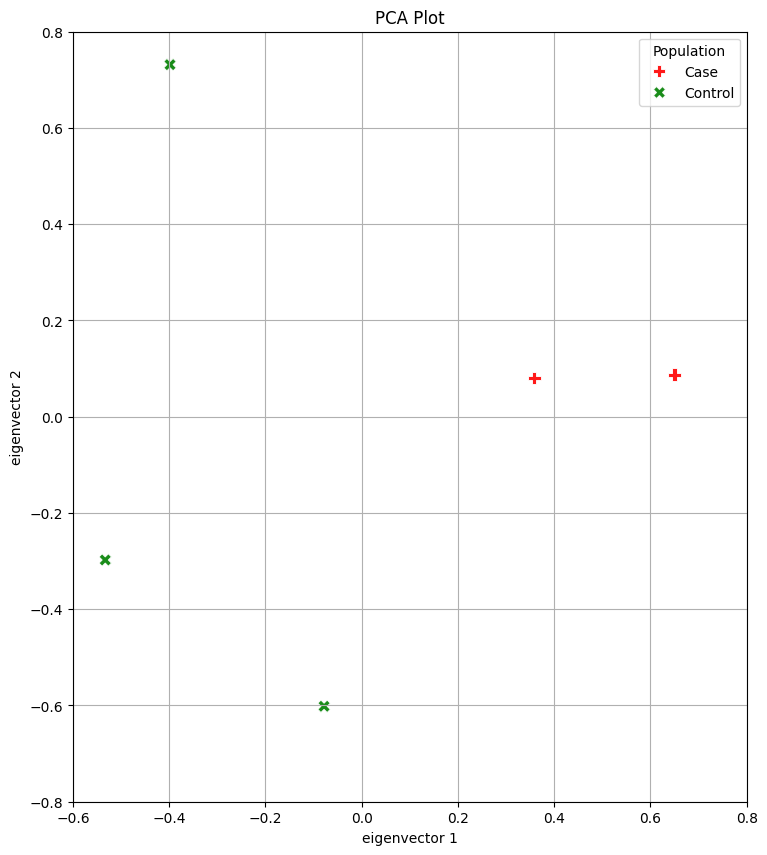

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the files
evec_file = '../EIG/EIGENSTRAT/example.pca.evec'
ind_file = '../EIG/EIGENSTRAT/example.ind'

# Read the .evec file, skipping the first line and handling whitespace issues
with open(evec_file, 'r') as f:
    lines = f.readlines()

# Skip the first line and split remaining lines into columns
data = []
for line in lines[1:]:
    parts = line.split()
    sample = parts[0]
    pcs = list(map(float, parts[1:-1]))
    population = parts[-1]
    data.append([sample] + pcs + [population])

# Create a DataFrame from the parsed data
columns = ['Sample'] + [f'PC{i}' for i in range(1, len(data[0]) - 1)] + ['Population']
evec_df = pd.DataFrame(data, columns=columns)

# Read the .ind file to get the population information
with open(ind_file, 'r') as f:
    lines = f.readlines()

# Parse the .ind file similarly
ind_data = []
for line in lines:
    parts = line.split()
    sample = parts[0]
    sex = parts[1]
    population = parts[2]
    ind_data.append([sample, sex, population])

# Create a DataFrame from the parsed .ind data
ind_df = pd.DataFrame(ind_data, columns=['Sample', 'Sex', 'Population'])

# Merge the DataFrames on the Sample column
merged_df = pd.merge(evec_df, ind_df[['Sample', 'Population']], on='Sample')

# Drop one of the duplicate Population columns
merged_df = merged_df.drop(columns=['Population_y']).rename(columns={'Population_x': 'Population'})

# Correcting the inversion by multiplying the principal components by -1
merged_df[['PC1', 'PC2']] = merged_df[['PC1', 'PC2']] * -1

# Plot the first two principal components using Seaborn
plt.figure(figsize=(10, 10))

# Adjusting the axis limits and markers to match the example plot
sns.scatterplot(
    data=merged_df, 
    x='PC1', 
    y='PC2', 
    hue='Population', 
    style='Population', 
    markers={'Case': 'P', 'Control': 'X'}, 
    s=80, 
    alpha=0.9, 
    palette={'Case': 'red', 'Control': 'green'}
)

plt.xlabel('eigenvector 1')
plt.ylabel('eigenvector 2')
plt.title('PCA Plot')
plt.legend(title='Population', loc='upper right')
plt.grid(True)
plt.xlim(-0.6, 0.8)
plt.ylim(-0.8, 0.8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
